In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
     

In [2]:
flights=pd.read_csv('/content/drive/MyDrive/flightszipped/flights.csv')
flights=flights.sample(n=100000)
flights.head()
     

<ipython-input-2-e02b4c99adcc>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights=pd.read_csv('/content/drive/MyDrive/flightszipped/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1263317,2015,3,23,1,DL,760,N3756,SMF,ATL,1241,...,1940.0,-25.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4168815,2015,9,17,4,AA,2173,N747UW,BOS,DCA,800,...,917.0,-28.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
385787,2015,1,26,1,AA,2348,N490AA,DFW,SLC,1150,...,1349.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1067377,2015,3,11,3,OO,2794,N899SK,SBP,PHX,1230,...,1349.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4478001,2015,10,6,2,WN,350,N770SA,13871,15016,1925,...,2019.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

flights.shape

(100000, 31)

In [4]:
flights.isnull().values.any()

True

In [5]:
flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              227
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1431
DEPARTURE_DELAY         1431
TAXI_OUT                1493
WHEELS_OFF              1493
SCHEDULED_TIME             0
ELAPSED_TIME            1784
AIR_TIME                1784
DISTANCE                   0
WHEELS_ON               1563
TAXI_IN                 1563
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1563
ARRIVAL_DELAY           1784
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    98494
AIR_SYSTEM_DELAY       81620
SECURITY_DELAY         81620
AIRLINE_DELAY          81620
LATE_AIRCRAFT_DELAY    81620
WEATHER_DELAY          81620
dtype: int64

<Axes: xlabel='CANCELLATION_REASON', ylabel='count'>

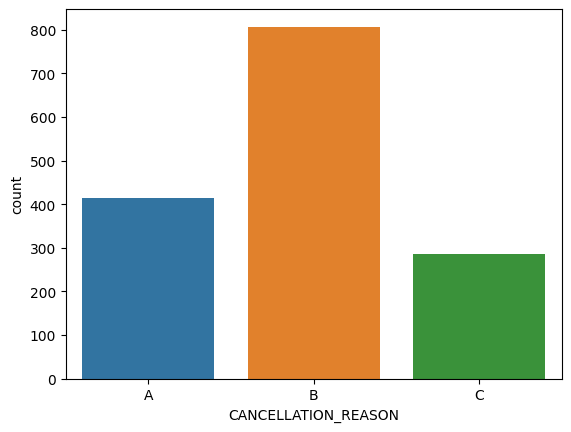

In [6]:
sns.countplot(x='CANCELLATION_REASON',data=flights)

<Axes: xlabel='MONTH', ylabel='count'>

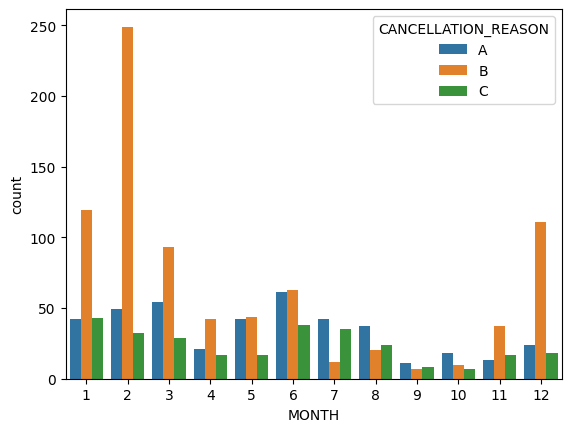

In [7]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

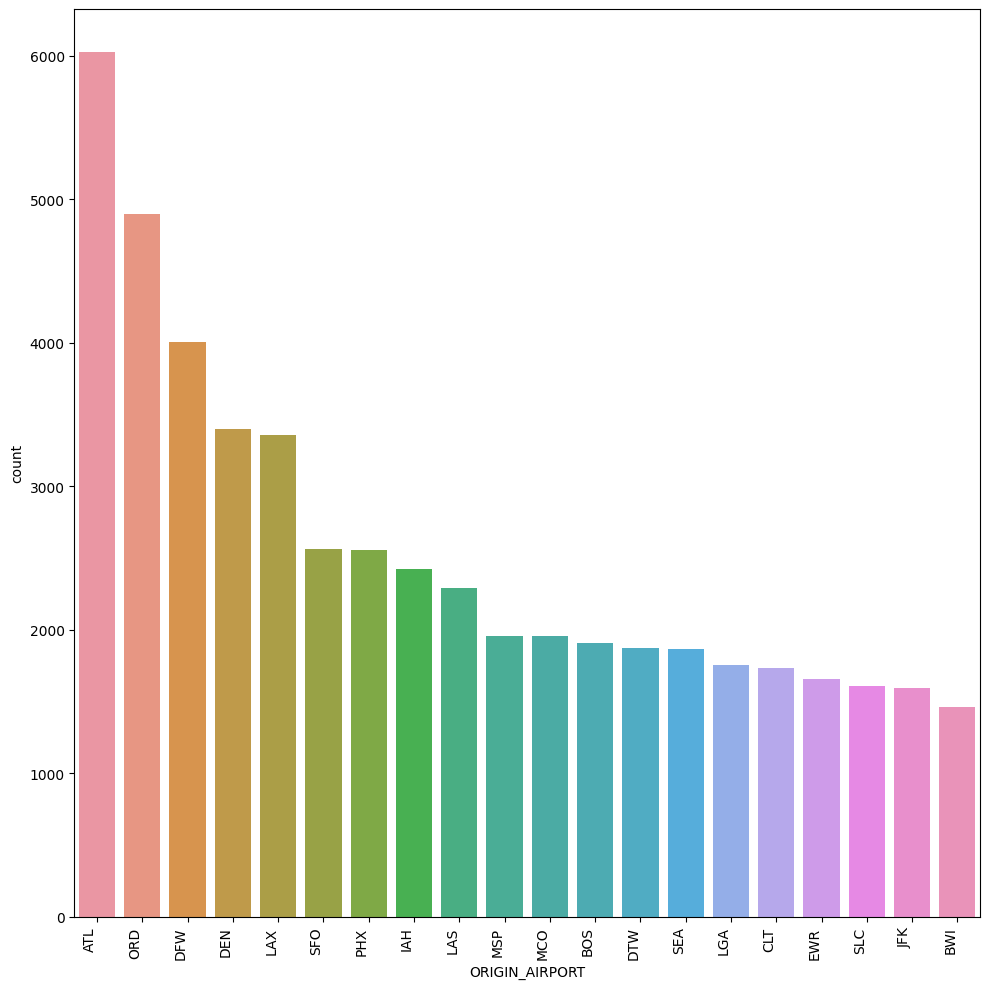

In [8]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

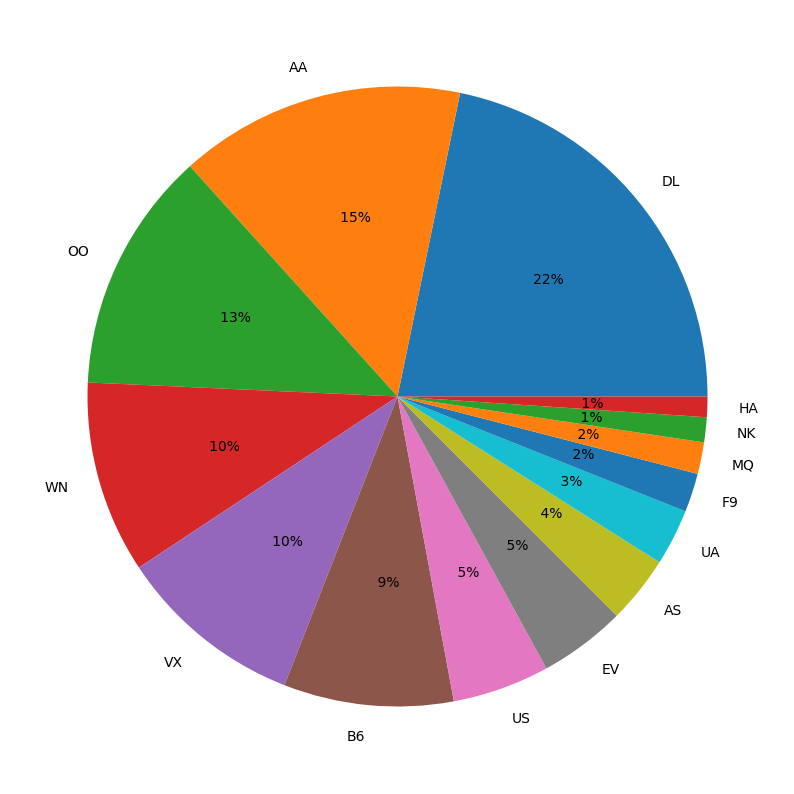

In [9]:

axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

<ipython-input-10-6b7ac7a3f431>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(flights.corr(),annot = True)


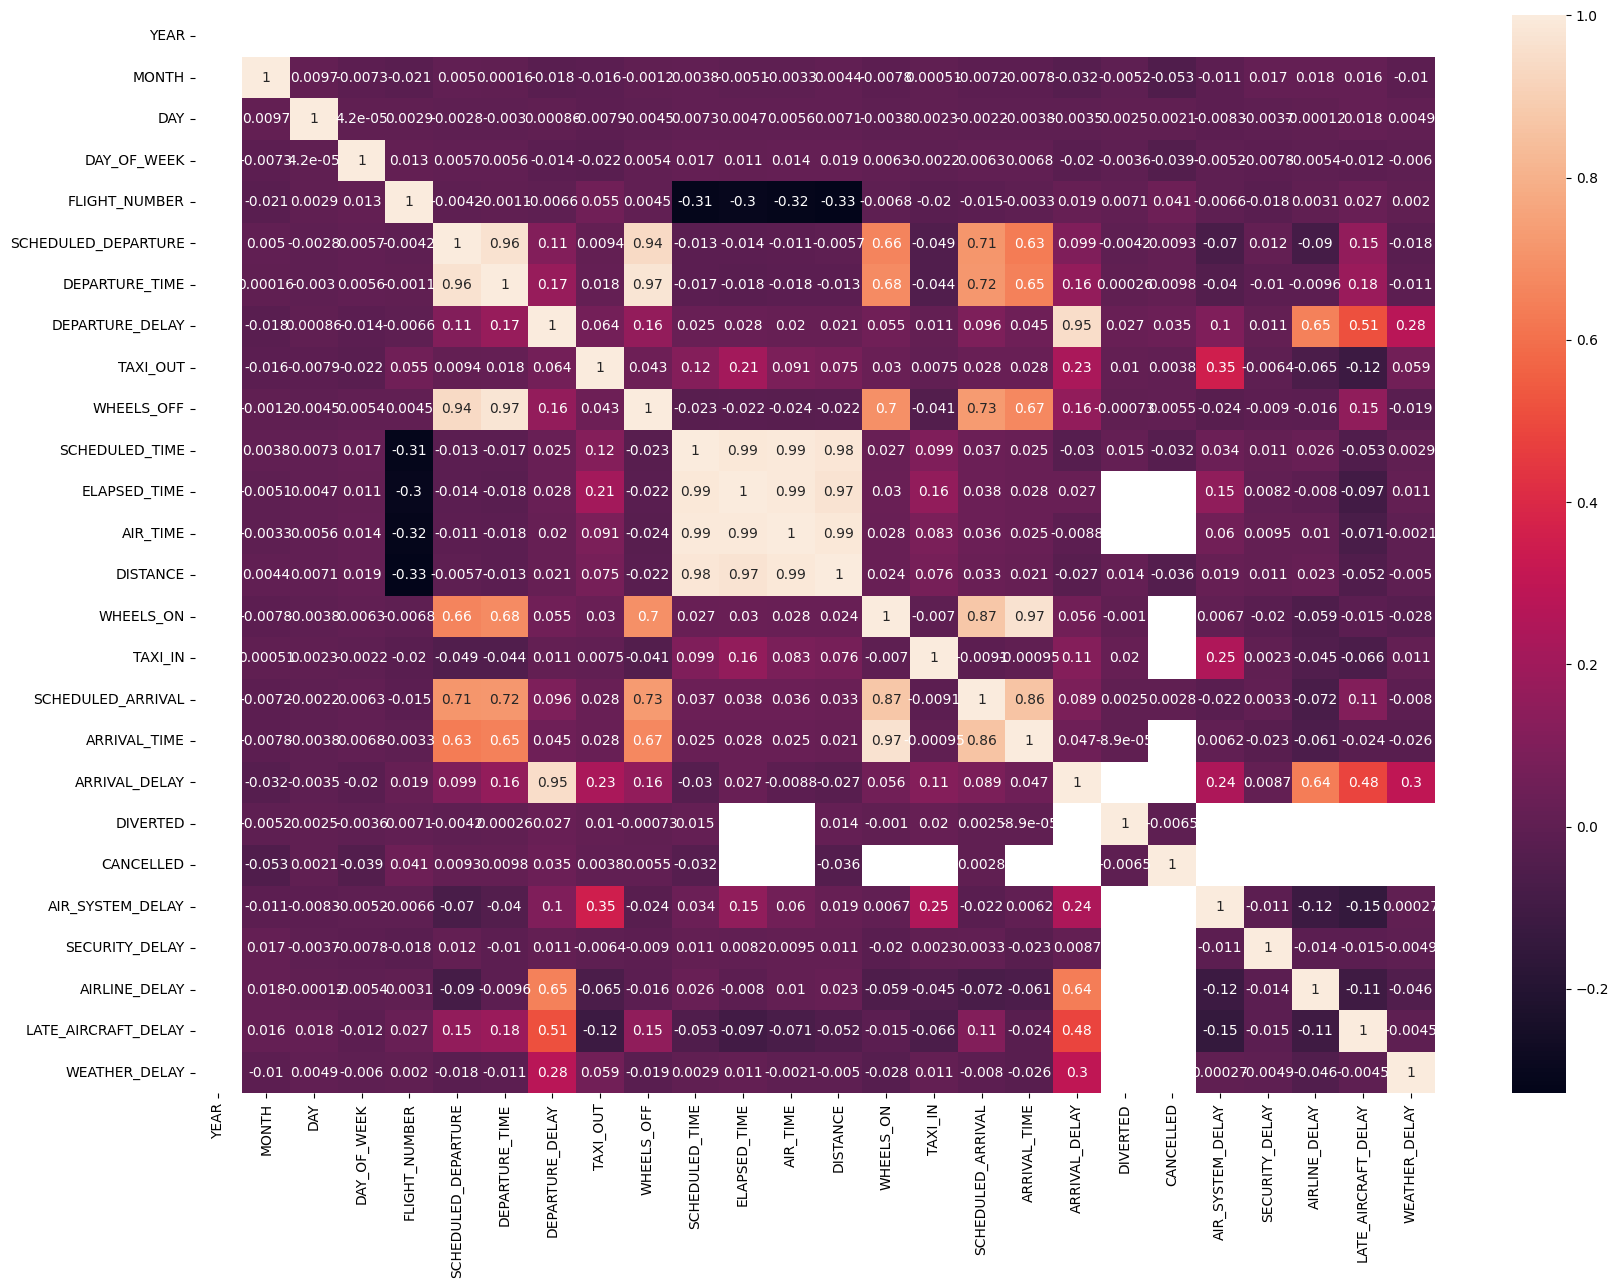

In [10]:

axis = plt.subplots(figsize=(20,14))
sns.heatmap(flights.corr(),annot = True)
plt.show()

In [11]:

corr=flights.corr()
corr

<ipython-input-11-90fc44020515>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=flights.corr()


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.009702,-0.007326,-0.021124,0.004955,0.000157,-0.018045,-0.016370,-0.001243,...,-0.007227,-0.007812,-0.032476,-0.005154,-0.053233,-0.011491,0.017296,0.018053,0.015698,-0.010165
DAY,NaN,0.009702,1.000000,0.000042,0.002884,-0.002800,-0.003042,0.000862,-0.007887,-0.004511,...,-0.002150,-0.003813,-0.003469,0.002526,0.002138,-0.008285,-0.003653,-0.000116,0.017721,0.004883
DAY_OF_WEEK,NaN,-0.007326,0.000042,1.000000,0.012673,0.005674,0.005596,-0.013958,-0.021838,0.005354,...,0.006252,0.006829,-0.020484,-0.003589,-0.039153,-0.005181,-0.007832,-0.005448,-0.012351,-0.005993
FLIGHT_NUMBER,NaN,-0.021124,0.002884,0.012673,1.000000,-0.004220,-0.001076,-0.006613,0.054546,0.004497,...,-0.015171,-0.003321,0.019477,0.007122,0.040649,-0.006574,-0.018150,0.003078,0.027054,0.002033
SCHEDULED_DEPARTURE,NaN,0.004955,-0.002800,0.005674,-0.004220,1.000000,0.963667,0.107066,0.009394,0.940442,...,0.711292,0.632266,0.098612,-0.004154,0.009292,-0.069747,0.012121,-0.090172,0.154219,-0.017656
DEPARTURE_TIME,NaN,0.000157,-0.003042,0.005596,-0.001076,0.963667,1.000000,0.171224,0.017537,0.974808,...,0.715683,0.650691,0.159660,0.000261,0.009837,-0.039936,-0.010052,-0.009587,0.181236,-0.010738
DEPARTURE_DELAY,NaN,-0.018045,0.000862,-0.013958,-0.006613,0.107066,0.171224,1.000000,0.063669,0.161585,...,0.095615,0.045406,0.948172,0.027001,0.034752,0.099765,0.011168,0.649020,0.514329,0.277819
TAXI_OUT,NaN,-0.016370,-0.007887,-0.021838,0.054546,0.009394,0.017537,0.063669,1.000000,0.042921,...,0.028425,0.028285,0.226690,0.010201,0.003827,0.354357,-0.006406,-0.065204,-0.116372,0.059209
WHEELS_OFF,NaN,-0.001243,-0.004511,0.005354,0.004497,0.940442,0.974808,0.161585,0.042921,1.000000,...,0.726109,0.668813,0.155385,-0.000732,0.005490,-0.024425,-0.008990,-0.016006,0.152582,-0.018635


In [12]:

variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [14]:
airport = pd.read_csv('/content/drive/MyDrive/flightszipped/airports.csv')
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [15]:

flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
1263317,3,23,1,DL,SMF,ATL,1241,-4.0,2092,-25.0
4168815,9,17,4,AA,BOS,DCA,800,-6.0,399,-28.0
385787,1,26,1,AA,DFW,SLC,1150,23.0,989,8.0
1067377,3,11,3,OO,SBP,PHX,1230,-12.0,509,-20.0
4478001,10,6,2,WN,OTHER,OTHER,1925,-6.0,342,-11.0
...,...,...,...,...,...,...,...,...,...,...
1867905,4,29,3,UA,SEA,DEN,1749,-8.0,1024,-17.0
5597634,12,17,4,OO,FAT,SLC,1630,-3.0,501,-16.0
1275934,3,24,2,WN,LBB,DAL,835,-6.0,293,-12.0
5435119,12,7,1,WN,LAS,MSY,900,1.0,1500,-7.0


In [16]:
print(flights.ORIGIN_AIRPORT.nunique())
print(flights.DESTINATION_AIRPORT.nunique())
print(flights.AIRLINE.nunique())

320
319
14


In [17]:
flights=flights.dropna()
flights
     

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
1263317,3,23,1,DL,SMF,ATL,1241,-4.0,2092,-25.0
4168815,9,17,4,AA,BOS,DCA,800,-6.0,399,-28.0
385787,1,26,1,AA,DFW,SLC,1150,23.0,989,8.0
1067377,3,11,3,OO,SBP,PHX,1230,-12.0,509,-20.0
4478001,10,6,2,WN,OTHER,OTHER,1925,-6.0,342,-11.0
...,...,...,...,...,...,...,...,...,...,...
1867905,4,29,3,UA,SEA,DEN,1749,-8.0,1024,-17.0
5597634,12,17,4,OO,FAT,SLC,1630,-3.0,501,-16.0
1275934,3,24,2,WN,LBB,DAL,835,-6.0,293,-12.0
5435119,12,7,1,WN,LAS,MSY,900,1.0,1500,-7.0


In [18]:

df=pd.DataFrame(flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
1263317,3,23,SUNDAY,DL,SMF,ATL,1241,-4.0,2092,-25.0
4168815,9,17,WEDNESDAY,AA,BOS,DCA,800,-6.0,399,-28.0
385787,1,26,SUNDAY,AA,DFW,SLC,1150,23.0,989,8.0
1067377,3,11,TUESDAY,OO,SBP,PHX,1230,-12.0,509,-20.0
4478001,10,6,MONDAY,WN,OTHER,OTHER,1925,-6.0,342,-11.0
...,...,...,...,...,...,...,...,...,...,...
1867905,4,29,TUESDAY,UA,SEA,DEN,1749,-8.0,1024,-17.0
5597634,12,17,WEDNESDAY,OO,FAT,SLC,1630,-3.0,501,-16.0
1275934,3,24,MONDAY,WN,LBB,DAL,835,-6.0,293,-12.0
5435119,12,7,SUNDAY,WN,LAS,MSY,900,1.0,1500,-7.0


In [19]:

dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
1263317,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4168815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
385787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1067377,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4478001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867905,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5597634,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1275934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5435119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [20]:
df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=656)

In [21]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
1263317,3,23,1241,-4.0,2092,-25.0
4168815,9,17,800,-6.0,399,-28.0
385787,1,26,1150,23.0,989,8.0
1067377,3,11,1230,-12.0,509,-20.0
4478001,10,6,1925,-6.0,342,-11.0
...,...,...,...,...,...,...
1867905,4,29,1749,-8.0,1024,-17.0
5597634,12,17,1630,-3.0,501,-16.0
1275934,3,24,835,-6.0,293,-12.0
5435119,12,7,900,1.0,1500,-7.0


In [22]:

data=pd.concat([df,df_cat],axis=1)
data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
1263317,3,23,1241,-4.0,2092,-25.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4168815,9,17,800,-6.0,399,-28.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
385787,1,26,1150,23.0,989,8.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1067377,3,11,1230,-12.0,509,-20.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4478001,10,6,1925,-6.0,342,-11.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867905,4,29,1749,-8.0,1024,-17.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5597634,12,17,1630,-3.0,501,-16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1275934,3,24,835,-6.0,293,-12.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5435119,12,7,900,1.0,1500,-7.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:

final_data = data.sample(n=60000)
final_data
     

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
3896542,8,30,1425,12.0,971,11.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3447198,8,3,1002,-3.0,502,-15.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2407822,6,2,1015,85.0,1062,72.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3854374,8,27,1809,-7.0,247,-16.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1692992,4,18,2215,-1.0,451,-9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138183,1,9,1735,-12.0,261,-13.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5427506,12,6,1745,-10.0,370,-9.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
357565,1,24,1145,-6.0,387,-14.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1451487,4,3,1912,-4.0,646,-9.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [24]:

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY

In [26]:

X

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
3896542,8,30,1425,971,11.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3447198,8,3,1002,502,-15.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2407822,6,2,1015,1062,72.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3854374,8,27,1809,247,-16.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1692992,4,18,2215,451,-9.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138183,1,9,1735,261,-13.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5427506,12,6,1745,370,-9.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
357565,1,24,1145,387,-14.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1451487,4,3,1912,646,-9.0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
Y

3896542    12.0
3447198    -3.0
2407822    85.0
3854374    -7.0
1692992    -1.0
           ... 
138183    -12.0
5427506   -10.0
357565     -6.0
1451487    -4.0
255491      0.0
Name: DEPARTURE_DELAY, Length: 60000, dtype: float64

In [29]:

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [30]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [31]:

y_pred = reg_rf.predict(X_test)

In [32]:

reg_rf.score(X_train,y_train)

0.9902064340342664

In [33]:
reg_rf.score(X_test,y_test)

0.9198354735346875

In [34]:
metrics.r2_score(y_test,y_pred)

0.9198354735346875

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 6.100608333333334
MSE: 103.12256355
RMSE: 10.1549280425811


In [36]:

pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
4480873,-3.0,-2.94
5707278,68.0,27.83
3731592,-5.0,-2.41
4264732,-6.0,-5.30
3027296,15.0,3.35
...,...,...
2177222,179.0,174.02
1271452,-10.0,-0.63
5724992,38.0,41.89
741588,21.0,18.20


In [37]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [38]:

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [45]:
# Random search of parameters, using 5 fold cross validation,search across 25 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 5, cv = 5, verbose=2)

In [46]:

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=10; total time=   3.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=10; total time=   4.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=10; total time=   2.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=10; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=10; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=182; total time=   5.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=182; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=18

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=113; total time= 2.2min


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=113; total time= 2.2min


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=113; total time= 2.2min


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=113; total time= 2.2min


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=113; total time= 2.2min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=165; total time=  11.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=165; total time=  11.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=165; total time=  11.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=165; total time=  11.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=165; total time=  11.7s


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [47]:
rf_random.best_params_

{'n_estimators': 113,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [48]:
p=rf_random.predict(X_test)

In [49]:

metrics.r2_score(y_test,p)

0.9225553948334255

In [50]:

print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))


MAE: 6.042738989236697
MSE: 99.62369354667663
RMSE: 9.981166943132283


In [51]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
4480873,-3.0,-2.375551
5707278,68.0,28.182618
3731592,-5.0,-1.543607
4264732,-6.0,-3.994362
3027296,15.0,2.825213
...,...,...
2177222,179.0,173.433101
1271452,-10.0,-0.648642
5724992,38.0,40.706472
741588,21.0,17.128101


In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [53]:
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)


In [54]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 6.052846092207064
MSE: 98.9028532676916
RMSE: 9.944991365893266


In [55]:
metrics.r2_score(y_test,pre)

0.9231157554143952

In [56]:

gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg


,Actual,Predicted
4480873,-3.0,-0.847526
5707278,68.0,28.429379
3731592,-5.0,-0.532624
4264732,-6.0,-4.060390
3027296,15.0,1.719704
...,...,...
2177222,179.0,170.559397
1271452,-10.0,-0.493693
5724992,38.0,40.693057
741588,21.0,14.176820


In [57]:

def predict(MONTH, DAY,SCHEDULED_DEPARTURE,DISTANCE, ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK):
    AIRLINE_index = np.where(X.columns==AIRLINE)[0][0]
    ORIGIN_index = np.where(X.columns==ORIGIN_AIRPORT)[0][0]
    DESTINATION_index = np.where(X.columns==DESTINATION_AIRPORT)[0][0]
    DAY_OF_WEEK_index = np.where(X.columns==DAY_OF_WEEK)[0][0]
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = SCHEDULED_DEPARTURE
    x[3] = DISTANCE
    x[4] = ARRIVAL_DELAY
    if AIRLINE_index >=0:
        x[AIRLINE_index] = 1
    if ORIGIN_index >=0:
        x[ORIGIN_index] = 1
    if DESTINATION_index >=0:
        x[DESTINATION_index] = 1
    if  DAY_OF_WEEK_index >= 0:
        x[ DAY_OF_WEEK_index] = 1

    return gbr.predict([x])[0]

In [58]:
res= predict(5,6,1515,328,-8.0,'AIRLINE_OO','ORIGIN_AIRPORT_PHX','DESTINATION_AIRPORT_ABQ','DAY_OF_WEEK_TUESDAY')
res
     

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


-4.311606239392942

In [59]:

if(res<=-15):
  print("Flight is delayed")
else:
  print("Flight is not delayed")
  

Flight is not delayed


In [61]:
!pip install streamlit
 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=759571f9890236118d20353844519d3c28229627c5f2599edd09c03d7c49bc53
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [62]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

def loadData():
    flights = pd.read_csv('/home/vaishali/projects/python_proj/Flight/flights.csv')
    airport = pd.read_csv('/home/vaishali/projects/python_proj/Flight/airports.csv')

    variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
    flights.drop(variables_to_remove,axis=1,inplace= True)

    flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
    flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'

    flights=flights.dropna()

    df=pd.DataFrame(flights)
    df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
    df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)

    dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
    df_cat=pd.get_dummies(df[dums],drop_first=True)

    var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
    df.drop(var_to_remove,axis=1,inplace=True)

    data=pd.concat([df,df_cat],axis=1)
    final_data = data.sample(n=60000)
    return final_data

def preprocessing(final_data):
    X=final_data.drop("DEPARTURE_DELAY",axis=1)
    Y=final_data.DEPARTURE_DELAY
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    return X_train,y_train,X

def rfg(X_train,y_train):
    reg_rf = RandomForestRegressor()
    reg_rf.fit(X_train,y_train)
    return reg_rf

def accept_data():
    month = st.number_input("Enter month ",min_value=1,max_value=12)
    day = st.number_input("Enter day",min_value=1,max_value=31)
    sch_dept = st.number_input("Enter scheduled departure")
    distance = st.number_input("Enter distance in miles")
    arrival_delay = st.number_input("Enter arrival delay (Enter negative value if arrival is delayed else enter positive value)")
    airline = st.text_area("Enter airline code in place of XX","AIRLINE_XX")
    origin = st.text_area("Enter origin airport code in place of XXX","ORIGIN_AIRPORT_XX")
    destination = st.text_area("Enter destination airport code in place of XXX","DESTINATION_AIRPORT_XX")
    day_of_week = st.text_area("Enter day of week in place of XX","XXDAY")
    return month,day,sch_dept,distance,arrival_delay,airline,origin,destination,day_of_week

def prediction(X,month, day,sch_dept,distance,arrival_delay,airline,origin,destination,day_of_week,reg_rf):
    AIRLINE_index = np.where(X.columns==airline)
    ORIGIN_index = np.where(X.columns==origin)
    DESTINATION_index = np.where(X.columns==destination)
    DAY_OF_WEEK_index = np.where(X.columns==day_of_week)
    x= np.zeros(len(X.columns))
    x[0] = month
    x[1] = day
    x[2] = sch_dept
    x[3] = distance
    x[4] = arrival_delay
    x[AIRLINE_index] = 1
    x[ORIGIN_index] = 1
    x[DESTINATION_index] = 1
    x[DAY_OF_WEEK_index] = 1
    return reg_rf.predict([x])[0]

def main():
    st.title("Flight Delay Prediction")
    st.subheader("Prediction using Machine Learning Algorithm")

    choice= st.selectbox("Choose Machine Learning Model",["None","Random Forest Regressor"])
    if choice=="Random Forest Regressor":
        final_data = loadData()
        X_train,y_train,X= preprocessing(final_data)
        reg_rf = rfg(X_train,y_train)

        month,day,sch_dept,distance,arrival_delay,airline,origin,destination,day_of_week = accept_data()

        if st.button("Predict using Random Forest Regressor"):
            res= prediction(X,month,day,sch_dept,distance,arrival_delay,airline,origin,destination,day_of_week,reg_rf)
            if(res>=0):
                text1= "Flight is not delayed. It will depart for next flight at scheduled time"
                st.write(text1)
            elif(res>= -15):
                text2= "Flight is only delayed by "+str(abs(res))+". Delays upto 15 minutes are considered as not delay. FLIGHT IS NOT DELAYED"
                st.write(text2)
            else:
                text3= "Flight is delayed by "+str(res)+". Delays by more than 15 minutes are considered to be actual delays. FLIGHT IS DELAY"
                st.write(text3)


if __name__=='__main__':
    main()

  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2023-04-27 08:34:47.600 
  command:

    streamlit run /usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py [ARGUMENTS]
